Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial shape: (269650, 24)
After cleaning shape: (269650, 18)
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6742/6742 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8728 - loss: 0.3105 - val_accuracy: 0.8990 - val_loss: 0.2556
Epoch 2/5
6742/6742 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8992 - loss: 0.2512 - val_accuracy: 0.9040 - val_loss: 0.2433
Epoch 3/5
6742/6742 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9066 - loss: 0.2372 - val_accuracy: 0.9082 - val_loss: 0.2323
Epoch 4/5
6742/6742 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9084 - loss: 0.2322 - val_accuracy: 0.9092 - val_loss: 0.2285
Epoch 5/5
6742/6742 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9105 - loss: 0.2261 - val_accuracy: 0.9085 - val_loss: 0.2311
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9066 - loss: 0.2339

Test Accuracy: 0.9085
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     25612
           1       0.90      0.93      0.91     28318

    accuracy                 

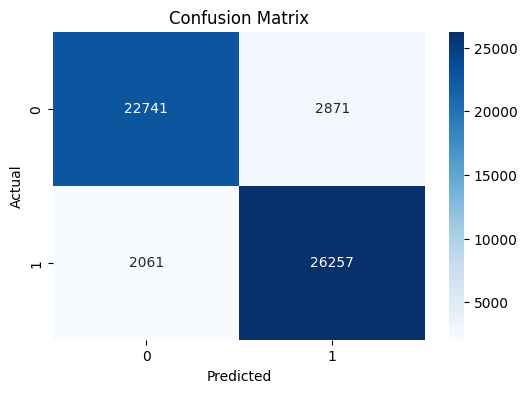

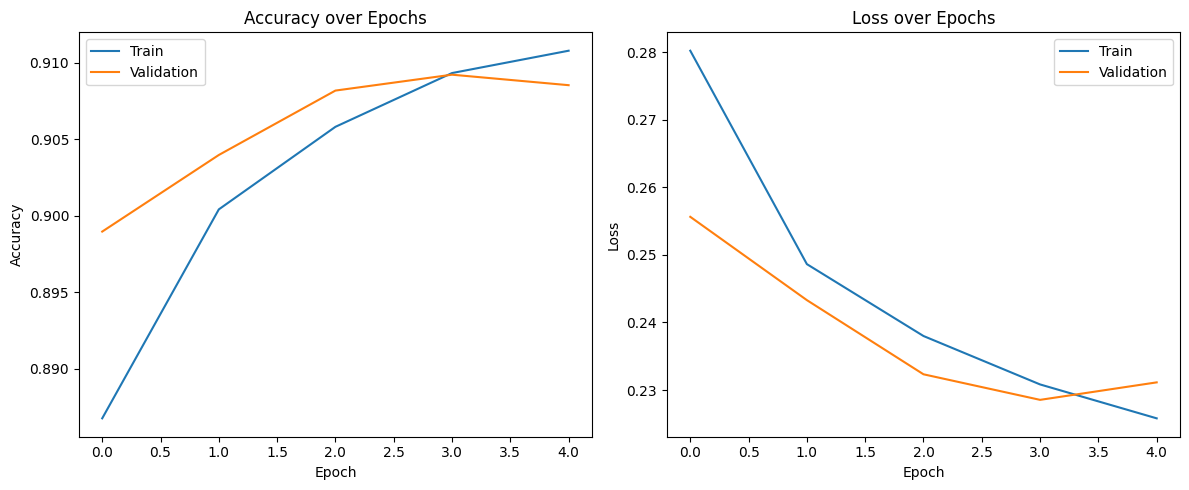

✅ Model saved to: /content/drive/MyDrive/models/phishing/ds4.h5


In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# STEP 3: Load the dataset
file_path = '/content/drive/MyDrive/models/phishing/ds (4).csv'
df = pd.read_csv(file_path)

print("Initial shape:", df.shape)

# STEP 4: Drop irrelevant columns
drop_cols = ['ID', 'TS_RATE_CALC', 'IP', 'WHOIS_NAME', 'WHOIS_ORG',
             'WHOIS_REGISTRAR', 'CERT_ISSUER']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# STEP 5: Feature engineering on DOMAIN_NAME
df['URL_LENGTH'] = df['DOMAIN_NAME'].astype(str).apply(len)
df['URL_DIGITS'] = df['DOMAIN_NAME'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))
df['URL_LETTERS'] = df['DOMAIN_NAME'].astype(str).apply(lambda x: sum(c.isalpha() for c in x))
df['URL_SPECIALS'] = df['DOMAIN_NAME'].astype(str).apply(lambda x: sum(not c.isalnum() for c in x))
df.drop(columns=['DOMAIN_NAME'], inplace=True)

# STEP 6: Ensure all other features are numeric
# First, remove non-numeric columns if any exist (like 'ROOT_DOMAIN', 'SECOND_DOMAIN')
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
df.drop(columns=non_numeric_cols, inplace=True)

# STEP 7: Drop rows with missing values (if any)
df = df.dropna()
print("After cleaning shape:", df.shape)

# STEP 8: Split features and target
X = df.drop(columns=['IS_PHISHING'])
y = df['IS_PHISHING']

# STEP 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 10: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 11: Build the DNN model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# STEP 12: Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=5, batch_size=32)

# STEP 13: Evaluate model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# STEP 14: Predictions and report
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# STEP 15: Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 16: Accuracy and loss graphs
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# STEP 17: Save model
model.save('/content/drive/MyDrive/models/phishing/ds4.h5')
print("✅ Model saved to: /content/drive/MyDrive/models/phishing/ds4.h5")
